# Machine Learning: Assignment 2
## KMeans clustering (max. 7p)

**Remember** to write your information below.

In [302]:
# TODO: Write your information here!
student_name = "Joonas Lahti, Kristian Pekkanen"
student_id = "AC6855, AD0462"

## Assignment 2.0: KMeans exercise
### Unsupervised learning
In the exercise, three (3) distinct clusters are generated using **synthetic values** of X and y coordinates.

These can be drawn in the (X,Y) coordinate system.

In [303]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def k_mean_distance(data, cx, cy, i_centroid, cluster_labels):    
    #  TODO: Function implementation to calculate the mean of distances of cluster centroids
    distances = [np.sqrt((x - cx) ** 2 + (y - cy) ** 2) for (x, y) in data[cluster_labels == i_centroid]]
    return np.mean(distances)


## Assignment 2.1
### Topic: Generation of synthetic data points (2 points)

Let's generate random data into a NumPy matrix and divide the array into the four (4) cluster of points.
* Each part includes **100** coordinate pairs. 
* The total number of elements in the array is **400 coordinate pairs**.

The points are generated, for example, with NumPy's function `np.random.rand()`.

The four cluster of points is generated with random numbers using the following *calculation formulas*:

* **100** points with (x, y) values between **[-1, 0]**
* **100** points with (x, y) values between **[1, 2]**
* **100** points with (x, y) values between **[3, 4]**
* **100** points with (x, y) values between **[3.5, 4.5]**

In [304]:
# TODO: Generate a total of 400 points, all with values in separate value sets
# TODO: Combine the values of the generated arrays into a single array.
# TODO: shuffle the values before the next step.
import numpy as np

cluster1 = np.random.rand(100, 2)
cluster1[:, 0] = cluster1[:, 0] - 1

cluster2 = np.random.rand(100, 2)
cluster2[:, 0] = cluster2[:, 0] + 1

cluster3 = np.random.rand(100, 2)
cluster3[:, 0] = cluster2[:, 0] + 3

cluster4 = np.random.rand(100,2)
cluster4[:,0] = cluster4[:, 0] + 3.5


X = np.vstack([cluster1, cluster2, cluster3, cluster4])

np.random.shuffle(X)

# Print the size of the array.
print(f"Length of matrix: {len(X)}")

Length of matrix: 400


## Assignment 2.2
### Topic: K-Means clustering and plotting (2 points)

Perform **clustering** on the dataset using the `cluster` module of `scikit-learn` library
[k-means method](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html).

When using the **KMeans** algorithm, the number of possible clusters can be set in advance, but here the algorithm is run with defaults.

Additional tip you should try in this exercise:

The algorithm of the **KMeans** machine learning model can be tuned in a variety of ways (the same applies to other ML implementations of sklearn) by changing the parameters.

     KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
      n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
      random_state=None, tol=0.0001, verbose=0)``

In [305]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)
# TODO: apply the entire data set



Let's find the center points (**centroids**) of the clusters.
Hint: `cluster_centers_`

In [306]:
# TODO: Retrieve cluster centers (centroids)
centroids = []
centroids = kmeans.cluster_centers_

# The center points of the clusters and their number are printed out
print(f"Number of centroids {len(centroids)} and positions: {centroids}")

Number of centroids 10 and positions: [[ 3.67547862  0.4835062 ]
 [-0.50127939  0.84359631]
 [ 1.16267938  0.50044673]
 [ 4.21722696  0.76057933]
 [ 4.24838334  0.23127313]
 [ 1.69387889  0.14002527]
 [-0.26374456  0.322822  ]
 [ 4.74645786  0.49294336]
 [ 1.62719773  0.72493361]
 [-0.75026146  0.43278131]]


Drawing clusters and centroids

Let's plot all the data points using a scatter plot.
* the calculated center points are plotted
Hint: `plt.scatter`

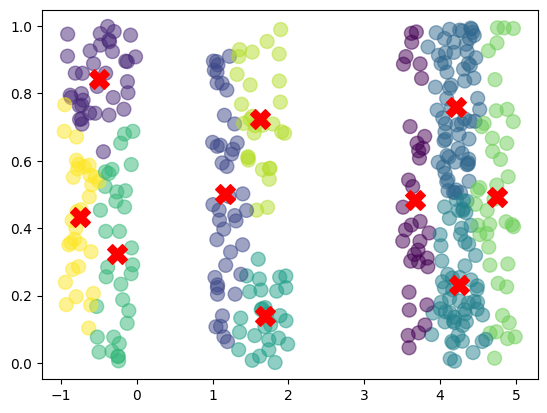

In [307]:
# TODO: Plot the points as a scatter plot
import matplotlib.pyplot as plt 

plt.scatter(X[:,0], X[:,1], s=100, c=kmeans.labels_, cmap='viridis', alpha=0.5)

# TODO: plot the calculated centroids
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='X', s=200, label='Centroids' )

## Assignment 2.3
### Topic: K-Means clustering - setting the number of cluster centroids (2 points)

Set the number of cluster centroids to *optimal number* of clusters.
The optimal number of clusters can be seen by examining the distribution of points using the figure.

In [308]:
# TODO: Set the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
# TODO: Retrieving cluster centroids
centroids = kmeans.cluster_centers_
# The center points of the clusters and their number are printed
print(f"Number of centroids {len(centroids)} and positions: {centroids}")

Number of centroids 3 and positions: [[ 4.23994869  0.50372736]
 [-0.50007734  0.54438814]
 [ 1.44612556  0.46462992]]


#### Visualize: Drawing clusters and centroids

Let's plot all the data points using a scatter plot.
* the calculated centroids are plotted
Hint: `plt.scatter`

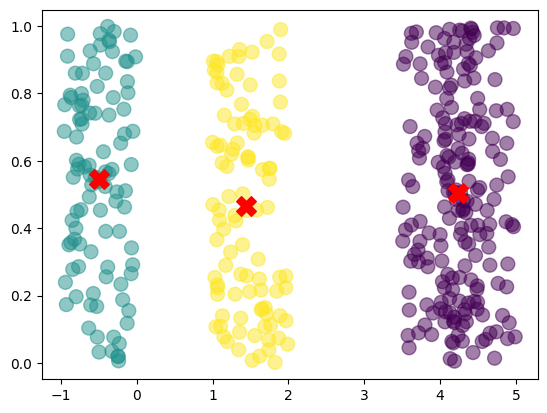

In [309]:
# TODO: Plot the points as a scatter plot
plt.scatter(X[:,0], X[:,1], s=100, c=kmeans.labels_, cmap='viridis', alpha=0.5)
# TODO: plot the calculated centroids
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='X', s=200, label='Centroids' )

## Assignment 2.4:
### Topic: Cluster distances as a line diagram (1 p)

Let's plot the average distances of the points of the clusters from the center of the cluster.
* implement the *k_mean_distance()* function given at the beginning of this document is used for drawing


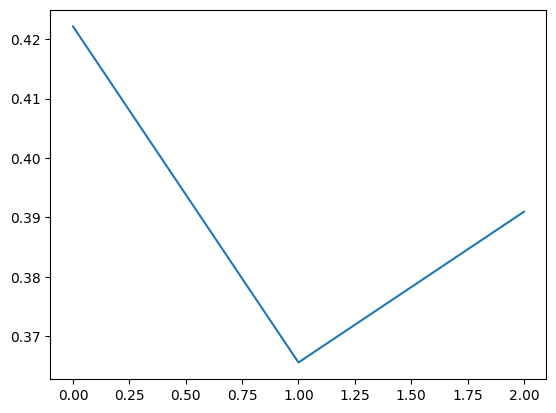

In [310]:
# TODO: Calculate and plot the average distances of cluster points from the cluster centroid
distances_from_center = []

for i, centroid in enumerate(centroids):
    distances_from_center.append(k_mean_distance(X, centroid[0], centroid[1], i, kmeans.labels_))

plt.plot(distances_from_center)
plt.show()